In [6]:
#importing libraries 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

## Libraries required for SLR


In [7]:
#library to split the data
from sklearn.model_selection import train_test_split

In [8]:
#importing libraries for linear regression 
# OLS Method
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as ols

In [9]:
#importing library for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer

In [10]:
#libraries for scaling 
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [11]:
#importing metrics libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Problem Statement

The New York City Controller's Office maintains a database of the salary and benefits paid to city employees since the fiscal year 2013. This is data representing the Employee Compensation report.

**Year Type:**		Fiscal (July through June) or Calendar (January through December)<br>

**Year:**		An accounting period of 12 months. The New York City operates operates on a fiscal year that begins on July 1 and ends on June 30 the following year. The Fiscal Year ending June 30, 2012 is represented as FY2011-2012.<br>

**Employee Identifier:**		Each distinct number in the “Employee Identifier” column represents one employee. These identifying numbers are not meaningful but rather are randomly assigned for the purpose of building this dataset.<br> 

**Salaries:**		Normal salaries paid to permanent or temporary City employees. <br>

**Overtime:**		Amounts paid to City employees working in excess of 40 hours per week. <br>

**Other Salaries:**		Various irregular payments made to City employees including premium pay, incentive pay, or other one-time payments. <br>

**Total Salary:**		The sum of all salaries paid to City employees.<br>

**Retirement:**		City contributions to employee retirement plans. <br>

**Health/Dental:**		City-paid premiums to health and dental insurance plans covering City employees. To protect confidentiality as legally required, pro-rated citywide averages are presented in lieu of employee-specific health and dental benefits. <br>

**Other Benefits:**		Mandatory benefits paid on behalf of employees, such as Social Security (FICA and Medicare) contributions, unemployment insurance premiums, and minor discretionary benefits not included in the above categories.<br>

**Total Benefits:**		The sum of all benefits paid to City employees.<br>

**Total Compensation:**		The sum of all salaries and benefits paid to City employees.

In [12]:
#importing dataframe 
df_compensation=pd.read_csv("employee_compensation.csv")
df_compensation.head()

,Year_Type,Year,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,42853,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,2015,28248,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
2,Fiscal,2014,30651,76536.95,13583.72,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82
3,Fiscal,2014,19473,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,2013,7176,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62


In [13]:
df_compensation.shape

(50000, 12)

In [14]:
df_compensation.size

600000

In [15]:
# use 'info()' to understand the dataset
df_compensation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Type            50000 non-null  object 
 1   Year                 50000 non-null  int64  
 2   Employee_Identifier  50000 non-null  int64  
 3   Salaries             50000 non-null  float64
 4   Overtime             50000 non-null  float64
 5   Other_Salaries       50000 non-null  float64
 6   Total_Salary         50000 non-null  float64
 7   Retirement           50000 non-null  float64
 8   Health/Dental        50000 non-null  float64
 9   Other_Benefits       50000 non-null  float64
 10  Total_Benefits       50000 non-null  float64
 11  Total_Compensation   50000 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 4.6+ MB


In [16]:
#checking for year 
df_compensation.Year_Type.value_counts()

Fiscal      28665
Calendar    21335
Name: Year_Type, dtype: int64

In [17]:
#checking for year 
df_compensation.Year.value_counts()

2015    14699
2014    14155
2013    13605
2016     7541
Name: Year, dtype: int64

In [18]:
#changing to object
df_compensation['Year'] = df_compensation['Year'].astype(object)

In [19]:
# recheck the data types using 'dtypes'
df_compensation.dtypes

Year_Type               object
Year                    object
Employee_Identifier      int64
Salaries               float64
Overtime               float64
Other_Salaries         float64
Total_Salary           float64
Retirement             float64
Health/Dental          float64
Other_Benefits         float64
Total_Benefits         float64
Total_Compensation     float64
dtype: object

In [20]:
df_compensation.columns

Index(['Year_Type', 'Year', 'Employee_Identifier', 'Salaries', 'Overtime',
       'Other_Salaries', 'Total_Salary', 'Retirement', 'Health/Dental',
       'Other_Benefits', 'Total_Benefits', 'Total_Compensation'],
      dtype='object')

### Remove insignificant variables

In [21]:
df_compensation = df_compensation.drop('Employee_Identifier',axis=1)

### Outlier treatment

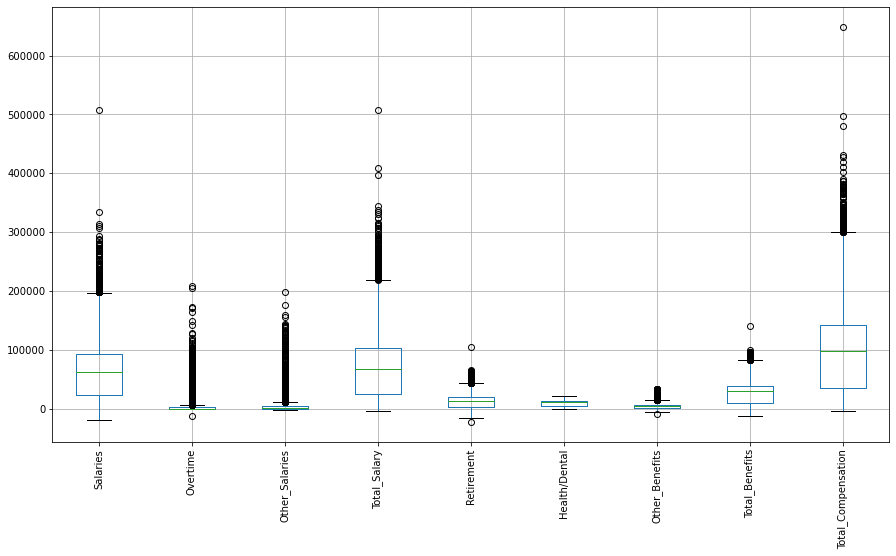

In [27]:
plt.figure(figsize = (15,8))
df_compensation.boxplot()
plt.xticks(rotation=90);

- Notice that the variables 'Salaries', 'Total_Salary' and 'Total_Compensation' have a quite large range as compared to the other variables. 
- Thus, it is difficult to see the outliers in such variables.
- So, we plot the boxplots of independent variables again by not considering the variables 'Salaries', 'Total_Salary' and 'Total_Compensation'. The variable Health/Dental has no outliers.

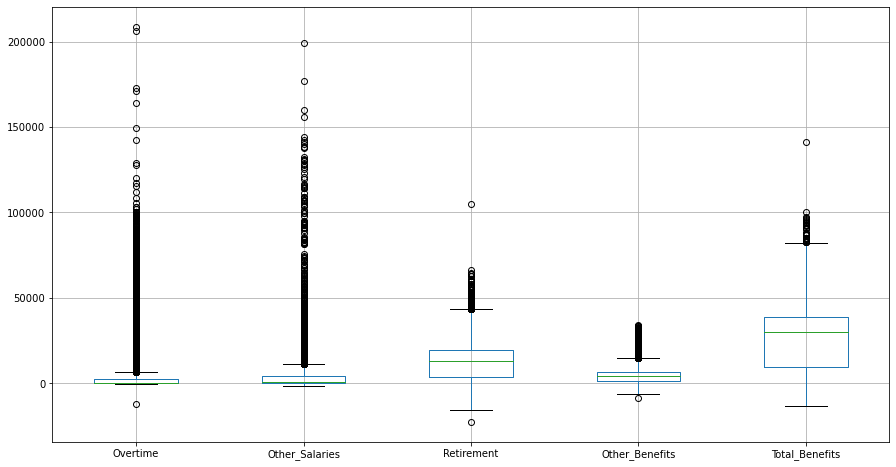

In [15]:
plt.figure(figsize = (15,8))
df_compensation.loc[:,['Overtime', 'Other_Salaries', 'Retirement', 'Other_Benefits', 'Total_Benefits']].boxplot();

In [29]:
df_num=df_compensation.select_dtypes(include=int)

In [ ]:
#use sns #take home 

In [31]:
df_compensation.isnull().sum()

Year_Type             0
Year                  0
Salaries              0
Overtime              0
Other_Salaries        0
Total_Salary          0
Retirement            0
Health/Dental         0
Other_Benefits        0
Total_Benefits        0
Total_Compensation    0
dtype: int64

In [16]:
# calculate the first quartile
Q1 = df_compensation.quantile(0.25)

# calculate the third quartile
Q3 = df_compensation.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df_compensation = df_compensation[~((df_compensation < (Q1 - 1.5 * IQR)) | (df_compensation > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
df_compensation.shape

(37721, 11)

In [ ]:
#np.where # take home



In [26]:
df_num =df_compensation.select_dtypes(include = np.number)



In [27]:
for i in df_num.columns:
    q1=df_num[i].quantile(0.25)
    q3=df_num[i].quantile(0.75)
    iqr=q3-q1
    ul=q3+(1.5*iqr)
    ll=q1-(1.5*iqr)
    df_num[i]=np.where(df_num[i]>ul,ul,df_num[i])
    df_num[i]=np.where(df_num[i]<ll,ll,df_num[i])
df_num

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,92288.22,267.45000,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,1466.38,348.23000,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
2,76536.95,6622.20625,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82
3,45659.88,0.00000,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,41832.00,0.00000,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62
...,...,...,...,...,...,...,...,...,...
49995,100222.50,6622.20625,600.00,117988.63,18763.05,13068.80,9406.86,41238.71,159227.34
49996,1787.41,0.00000,0.00,1787.41,0.00,563.31,145.36,708.67,2496.08
49997,36552.83,0.00000,0.00,36552.83,6802.48,6855.83,3071.63,16729.94,53282.77
49998,46995.30,0.00000,10943.14,57938.44,8840.98,10624.64,4706.37,24171.99,82110.43


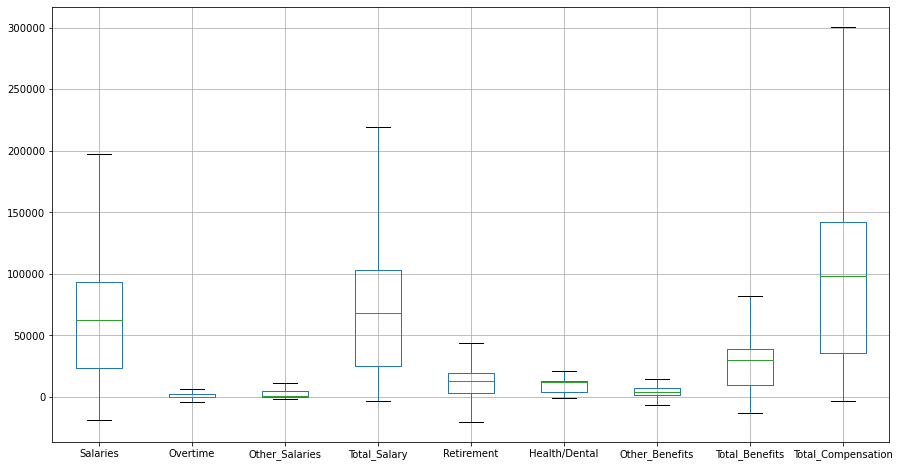

In [28]:
plt.figure(figsize = (15,8))
df_num.boxplot();

In [ ]:
df_cat=df_compensation.select_dtypes(include = object)

### Scaling the data 

In [18]:
df_compensation_1=df_compensation.copy()
df_compensation_2=df_compensation.copy()

In [19]:
df_compensation_1.head()

,Year_Type,Year,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,2015,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
3,Fiscal,2014,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,2013,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62
5,Calendar,2013,74132.00,0.00,1443.42,75575.42,14851.23,12888.34,6233.85,33973.42,109548.84


In [20]:
# scale the independent numeric variables
df_compensation_1.iloc[:, 2:11].head()

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
3,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62
5,74132.00,0.00,1443.42,75575.42,14851.23,12888.34,6233.85,33973.42,109548.84


## Using Standard Scaler for scaling 

In [19]:
#using formula 
df_compensation_1.iloc[:, 2:11] = df_compensation_1.iloc[:, 2:11].apply(lambda rec: (rec - rec.mean()) / rec.std())

df_compensation_1.iloc[:, 2:11].head()

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,0.983488,-0.228091,-0.474919,0.926912,1.178494,0.916565,1.145315,1.160922,1.001727
1,-1.252266,-0.167552,-0.587276,-1.263215,-1.180529,-1.491462,-1.259970,-1.365191,-1.304472
3,-0.164358,-0.428525,0.095551,-0.168961,-0.031662,-1.579733,-0.037039,-0.521484,-0.269306
4,-0.258589,-0.428525,-0.587276,-0.300194,-0.312417,-0.399832,-0.256852,-0.347973,-0.316586
5,0.536538,-0.428525,0.019113,0.511845,0.511937,0.994002,0.703228,0.731784,0.578543


In [20]:
ss=StandardScaler()

In [21]:
#using code
df_compensation_2.iloc[:, 2:11]=ss.fit_transform(df_compensation_2.iloc[:, 2:11])

In [23]:
df_compensation_2.iloc[:, 2:11].head()

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,0.983501,-0.228094,-0.474925,0.926924,1.178509,0.916577,1.145330,1.160937,1.001741
1,-1.252282,-0.167554,-0.587284,-1.263232,-1.180545,-1.491481,-1.259987,-1.365209,-1.304489
3,-0.164360,-0.428531,0.095552,-0.168963,-0.031662,-1.579754,-0.037040,-0.521491,-0.269309
4,-0.258592,-0.428531,-0.587284,-0.300198,-0.312421,-0.399837,-0.256855,-0.347977,-0.316591
5,0.536545,-0.428531,0.019113,0.511851,0.511944,0.994015,0.703237,0.731794,0.578551


# Model building

### Simple linear regression Model

In [26]:
x=df_compensation_1["Total_Benefits"]
y=df_compensation_1["Total_Compensation"]

In [31]:
#splitting the data set into train and test data set 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=1)

In [32]:
#checking the size of train and test data
print('x_train', xtrain.shape)
print('y_train', ytrain.shape)

# print dimension of test set
print('x_test', xtest.shape)
print('y_test', ytest.shape)

x_train (26404,)
y_train (26404,)
x_test (11317,)
y_test (11317,)


In [30]:
#Building a simple linear regression model 
#aading constant value - B0 - Beta not value
xtrain_con=sm.add_constant(xtrain)
xtest_con=sm.add_constant(xtest)

In [31]:
pd.DataFrame(xtrain_con)

,const,Total_Benefits
7580,1.0,0.354816
15923,1.0,1.316932
5380,1.0,0.242893
9580,1.0,-0.352773
3690,1.0,-1.353940
...,...,...
10391,1.0,1.522861
43031,1.0,-0.361594
6909,1.0,1.034111
16191,1.0,0.118453


In [33]:
#Building model
SLR_model= sm.OLS(ytrain, xtrain).fit()

In [34]:
SLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Total_Compensation   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                          4.730e+05
Date:                Tue, 20 Jun 2023   Prob (F-statistic):                        0.00
Time:                        18:51:49   Log-Likelihood:                          1460.8
No. Observations:               26404   AIC:                                     -2920.
Df Residuals:                   26403   BIC:                                     -2911.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Total_Benefits     0.9731      0.001    687.728      0.000       0.970       0.976
==============================================================================
Omnibus:                    12899.291   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           145525.864
Skew:                           2.077   Prob(JB):                         0.00
Kurtosis:                      13.725   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation:** The R-squared value obtained from this model is 94.7 which means that the above model explains 94.7% of the variation in the Total_Compensation. 

The `Durbin-Watson` test is used to check the autocorrelation between the residuals.

If the Durbin-Watson test statistic is near to 2: no autocorrelation<br>
If the Durbin-Watson test statistic is between 0 and 2: positive autocorrelation <br>
If the Durbin-Watson test statistic is between 2 and 4: negative autocorrelation

The summary output shows that the value of the test statistic is close to 2 (= 1.998) which means there is no autocorrelation.

The `Jarque-Bera` test is used to check the normality of the residuals. Here, the p-value of the test is less than 0.05; that implies the residuals are not normally distributed.

The 'Cond. No' (= 1) represents the `Condition Number (CN)` which is used to check the multicollinearity. 

If CN < 100: no multicollinearity<br>
If CN is between 100 and 1000: moderate multicollinearity<br>
If CN > 1000: severe multicollinearity

Thus, it can be seen that there is no multicollinearity in the data.

**Calculate the predicted Total_Compensation for train data using the above model.**

Use the above dataframe to predict the Total_Compensation.

In [35]:
# predict the Total_Compensation using 'predict()' on training data
y_train_pred = SLR_model.predict(xtrain)

# display the first five predicted values 
y_train_pred.head()

7580     0.345271
15923    1.281504
5380     0.236358
9580    -0.343282
3690    -1.317516
dtype: float64

Now we have actual and predicted values of the target variable for training dataset (y_train_slr and y_train_pred respectively)

<a id="mv"></a>
## 4.2 Measures of Variation

**Residual:** It is calculated as the difference between the actual and predicted value of the dependent variable.

<a id="ssr"></a>
### 4.2.1  Sum of Squared Residuals (SSR)

It is defined as the sum of the squared difference between the predicted value and the mean of the dependent variable.

In [54]:
# calculate the SSR on train dataset
ssr = np.sum((y_train_pred - ytrain.mean())**2)
ssr

24792.30012403018

<a id="sse"></a>
### 4.2.2 Sum of Squared Error (SSE)

It is defined as the sum of the squared difference between the actual value and the predicted value.

In [55]:
# calculate the SSE on train dataset
sse = np.sum((ytrain - y_train_pred)**2)
sse

1384.0108558748952

<a id="sst"></a>
### 4.2.3  Sum of Squared Total (SST)

It is the sum of the squared difference between the actual value and the mean of the dependent variable.

In [56]:
# calculate the SST on train dataset
sst = np.sum((ytrain - ytrain.mean())**2)
sst

26176.329730532045

In [57]:
# add the values of SSE and SSR
sse + ssr

26176.310979905073

**Interpretation:** From the abve putput, we can verify that SST (Total variation) is the sum of SSR and SSE.

<a id="r2"></a>
### 4.2.4 Coefficient of Determination (R-Squared)

The coefficient of determination explains the percentage of variation in the dependent variable that the independent variables explain collectively.

In [58]:
# calculate R-Squared on train dataset
# use 'rsquared' method from statsmodel
r_sq = SLR_model.rsquared

# print the R-squared value
r_sq

0.9471276313315786

Now, we can also calculate the R-squared value using the formula (SSR/SST).

In [59]:
# calculate R-Squared on train dataset using the formula
r_sq = ssr/sst

# print the R-squared value
r_sq

0.9471266743371002

**Interpretation:** From the above output we can conclude that our model explains 94.71% variation in the Total_Compensation. We can also obtain this value from the summary of the model.

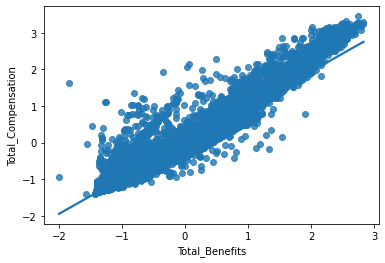

In [65]:
sns.regplot(x = xtrain, y = ytrain);

## Multiple Linear regression model

It is used to study the linear relationship between a dependent (target) variable and two or more independent variables. We can use this technique to study the effect of multiple variables on the target variable.

<a id="before"></a>
## 5.1 Assumptions Before MLR Model

There are several assumptions of linear regression. We can check two of them before building the regression model. Let us check the following assumptions in this section:<br>
1. Assumption on Dependent Variable<br>
2. No or little multicollinearity<br>

Let us create the dataframes for independent and target variable to check the assumptions of linear regression.

In [30]:
df_compensation=pd.read_csv("employee_compensation.csv")
df_compensation.head()

,Year_Type,Year,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,42853,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,2015,28248,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
2,Fiscal,2014,30651,76536.95,13583.72,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82
3,Fiscal,2014,19473,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,2013,7176,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62


In [29]:
# create dataframe of features by dropping the target variable
# 'axis = 1' drops the corresponding column(s)
df_feature = df_compensation.drop('Total_Compensation', axis = 1)

# create dataframe of target variable
df_target = df_compensation['Total_Compensation']

<a id="dep_num"></a>
### 5.1.1 Assumption on Dependent Variable

The assumption for linear regression is that the dependent (target) variable should be numeric. In our dataset, the variable 'Total_Compensation' is the target/dependent variable.  

In [ ]:
# check the data type of dependent variable
df_target.dtype

dtype('float64')

**Interpretation:** The output shows that the data type of target variable is 'float64'. i.e. the dependent variable is numeric.

<a id="no_multi"></a>
### 5.1.2 No or Little Multicollinearity

Whenever there are a large number of independent variables present in the dataset, there is a possibility that such independent variables will be strongly correlated. The presence of a strong correlation between the independent variables is called multicollinearity.

The presence of multicollinearity can destabilize the model. Thus, the existence of multicollinearity must be detected and corrected actions should be taken.

If we use dummy variables to encode a categorical variable and do not omit the parent column, then this results in a strong correlation between the dummy variables and the parent column.

<a id="corr"></a>
#### 5.1.2.1 Correlation Matrix

Let us plot the heatmap to visualize the correlation matrix of the independent variables. The variables with a high correlation may induce multicollinearity in the data.

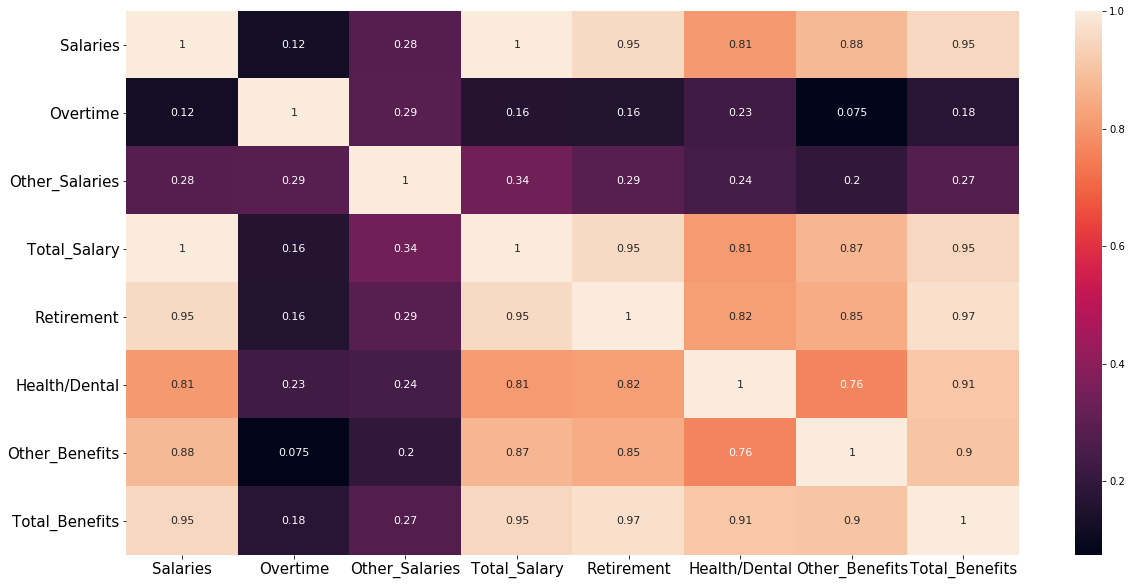

In [ ]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: used to set the font size of the annotation
sns.heatmap(df_feature.corr(), annot = True, annot_kws = {"size": 11})

# rotation = 'horizontal' rotates the y-axis labels horizontally
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

Identify the variables with a correlation greater than 0.6 and less than -0.6.

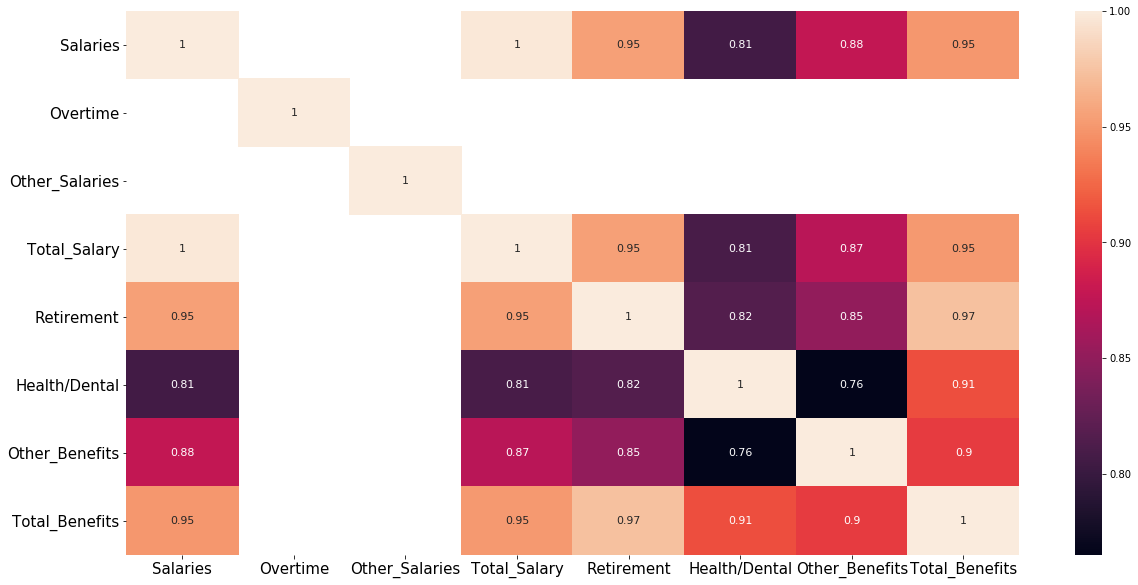

In [ ]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(df_feature.corr()[np.abs(df_feature.corr()) > 0.6], annot = True, annot_kws = {"size": 11})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The above heatmap, show the variables having a strong positive/negative correlation. The variables with dark blue shade represent the strong positive correlation and the ones with lighter shade represent the strong negative correlation.

<a id="vif"></a>
#### 5.1.2.2 Variance Inflation Factor (VIF)

The Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity between the features. The value of VIF equal to 1 indicates that no features are correlated. We calculate VIF of the numerical independent variables.   

Steps to calculate VIF:<br>
1. Regress one independent variable (say V<sub>i</sub>) on all the remaining independent variables (say V<sub>j</sub>, j ≠ i)
2. Calculate R-squared of the regression model
3. Calculate VIF for the variable V<sub>i</sub> using the formula:
<p style='text-indent:29em'> <strong> VIF = 1 / (1 - R-squared)</strong>  </p><br>
4. Repeate the steps 1 to 3 to calculate VIF of each independent variable

In [ ]:
# filter the numerical features in the dataset
df_numeric_features_vif = df_feature.select_dtypes(include=[np.number])

# display the first five observations
df_numeric_features_vif.head()

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits
0,0.983488,-0.228091,-0.474919,0.926912,1.178494,0.916565,1.145315,1.160922
1,-1.252266,-0.167552,-0.587276,-1.263215,-1.180529,-1.491462,-1.259970,-1.365191
3,-0.164358,-0.428525,0.095551,-0.168961,-0.031662,-1.579733,-0.037039,-0.521484
4,-0.258589,-0.428525,-0.587276,-0.300194,-0.312417,-0.399832,-0.256852,-0.347973
5,0.536538,-0.428525,0.019113,0.511845,0.511937,0.994002,0.703228,0.731784


#### Calculate the VIF for each numeric variable.

In [ ]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

# create a column of variable names
vif["Features"] = df_numeric_features_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,302871086.960378,Total_Benefits
1,276118967.664109,Health/Dental
2,55639360.247011,Retirement
3,32109901.454055,Other_Benefits
4,30982752.278689,Overtime
5,29613799.212063,Total_Salary
6,14713019.966631,Other_Salaries
7,4599754.026275,Salaries


The output shows that the variable 'Total_Benefits' has the highest VIF. Now, we use the `for loop` to find VIF and remove the variables with VIF greater than 10. We set the threshold to 10, as we wish to remove the variable for which the remaining variables explain more than 90% of the variation. One can choose the threshold  other than 10. (it depends on the business requirements)